### Librerías

In [1]:
#  TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
# VISUALIZACIÓN DE DATOS
import seaborn as sns
import matplotlib.pyplot as plt
# MODELOS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from scipy.stats import pearsonr
from sklearn import metrics

from statsmodels import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from pathlib import Path
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### Datos

In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


target : median_house_value

### Primera exploración

In [3]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


- total_bedrooms con valores faltantes.
- ocean_proximity con 5 valores únicos, categórica ordinal
- los tipos de datos no son los correctos,  housing_median_age, population en float -> int 

In [6]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.duplicated().sum()

0

In [8]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### EDA

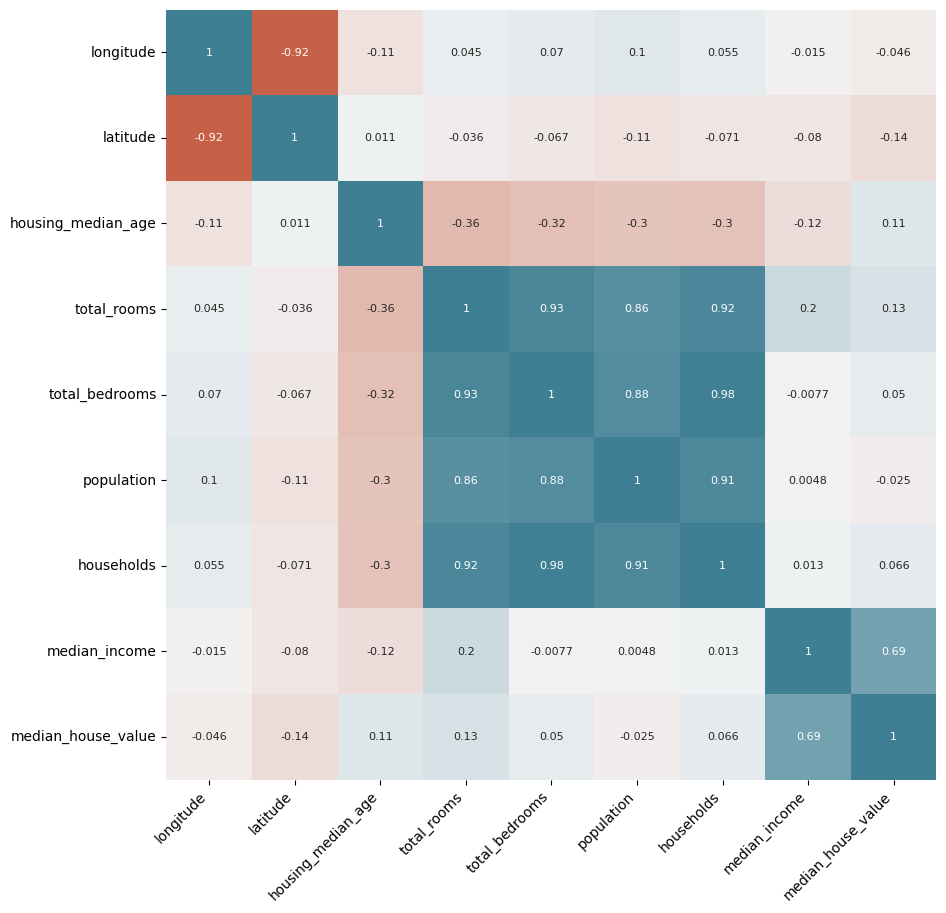

In [9]:
# Heatmap matriz de correlaciones
# ==============================================================================
# corr_matrix = housing.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# sns.heatmap(
#     corr_matrix,
#     annot     = True,
#     cbar      = False,
#     annot_kws = {"size": 8},
#     vmin      = -1,
#     vmax      = 1,
#     center    = 0,
#     cmap      = sns.diverging_palette(20, 220, n=200),
#     square    = True,
#     ax        = ax
# )

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right',
# )

# ax.tick_params(labelsize = 10)

- Longitude y latitude presentan correlación inversa perfecta
- total_rooms presenta corelación perfecta con households - total_bedrooms

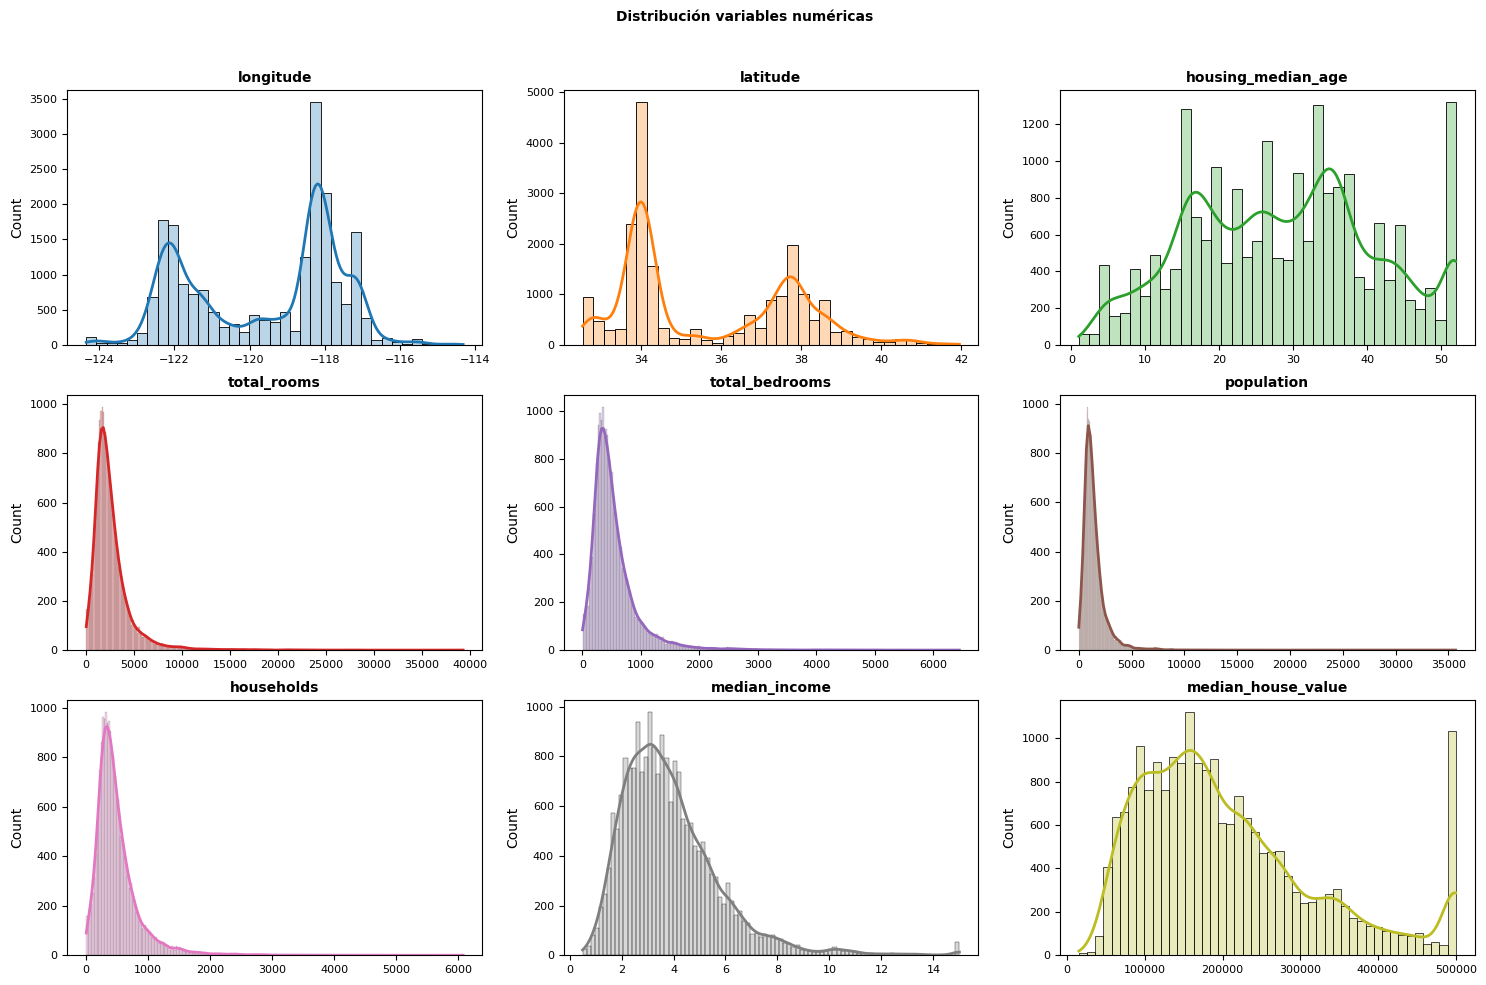

In [10]:
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
# axes = axes.flat
# columnas_numeric = housing.select_dtypes(include=['float64', 'int']).columns

# for i, colum in enumerate(columnas_numeric):
#     sns.histplot(
#         data    = housing,
#         x       = colum,
#         stat    = "count",
#         kde     = True,
#         color   = (list(plt.rcParams['axes.prop_cycle'])*3)[i]["color"],
#         line_kws= {'linewidth': 2},
#         alpha   = 0.3,
#         ax      = axes[i]
#     )
#     axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
#     axes[i].tick_params(labelsize = 8)
#     axes[i].set_xlabel("")


    
# fig.tight_layout()
# plt.subplots_adjust(top = 0.9)
# fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

- households - population - total_bedrooms - toltal_rooms presentan una distribución logarítmica
- La target presenta una distribución Gamma

#### Trata de missings y modificación de columnas categóricas a númericas

In [19]:
housing.dropna(inplace=True)

In [13]:
#  # Calcula la mediana
# mediana = housing_nuevo['total_bedrooms'].median()
# housing_nuevo['total_bedrooms'].fillna(mediana, inplace=True)

In [16]:
# housing_nuevo['total_rooms'] = housing_nuevo['total_rooms'].astype(int)
# housing_nuevo['housing_median_age'] =  housing_nuevo['housing_median_age'].astype(int)
# housing_nuevo['total_bedrooms'] = housing_nuevo['total_bedrooms'].astype(int)

#### Dividimos en train y test

In [20]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=24)

In [21]:
X_train, X_val, y_train, Y_val = train_test_split(train_set.drop(columns = 'median_house_value'), train_set['median_house_value'], test_size= 0.2, random_state = 25)

#### Escalamos antes de probar el cross_val_score

In [ ]:
# def apply_onehot_encoder(train:pd.DataFrame, columns_to_encode:list, test:pd.DataFrame=None):
    
#     # Resetear índices para evitar desalineación
#     train = train.reset_index(drop=True)
    
#     # Crear el OneHotEncoder
#     encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

#     # Ajustar y transformar las columnas seleccionadas
#     transformed_data = encoder.fit_transform(train[columns_to_encode])

#     # Crear un DataFrame con las columnas transformadas
#     transformed_df = pd.DataFrame(transformed_data, columns=encoder.get_feature_names_out(columns_to_encode))
    
#     # Concatenar con el DataFrame original excluyendo las columnas transformadas
#     df_concatenated = pd.concat([train.drop(columns_to_encode, axis=1), transformed_df], axis=1)

#     # Si se proporciona un segundo DataFrame, aplicar la misma transformación
#     if test is not None:
#         transformed_data_to_transform = encoder.transform(test[columns_to_encode])
#         transformed_df_to_transform = pd.DataFrame(transformed_data_to_transform, columns=encoder.get_feature_names_out(columns_to_encode))
#         df_to_transform_concatenated = pd.concat([test.drop(columns_to_encode, axis=1), transformed_df_to_transform], axis=1)
#         return df_concatenated, df_to_transform_concatenated

#     return df_concatenated

##### Estandarización de la target

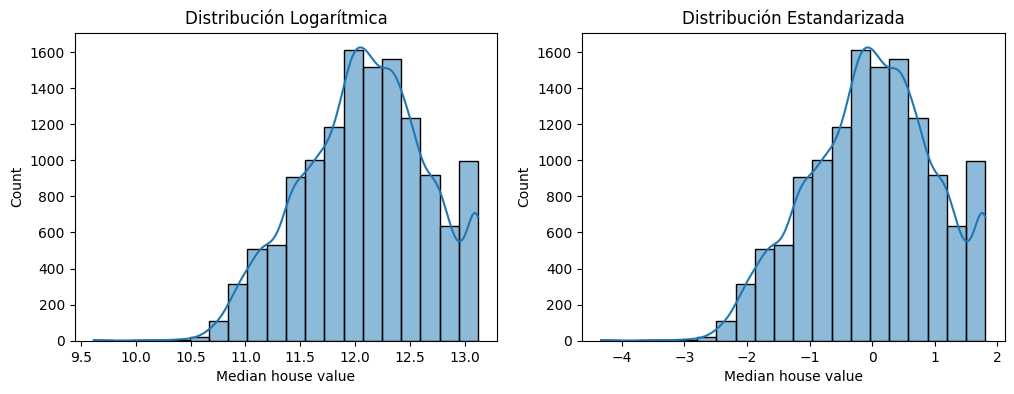

In [28]:
from sklearn.preprocessing import StandardScaler
# Aplicar la transformación logarítmica
log_transformed_data = np.log(y_train)
log_transformed_data = log_transformed_data.values.reshape(-1, 1)  # Asegurar que sea una matriz 2D
plt.figure(figsize=(6, 4))
# Visualizar la distribución estandarizada
sns.histplot(log_transformed_data, kde=True, color='#800080', bins=20, alpha=0.5,legend= False)
plt.title('Distribución Logarítmica')
plt.xlabel('Median house value') 

##### Escalado y logarítmica a las otras columnas

In [22]:
col_log = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
col_std = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','housing_median_age']
col_ohe = ['ocean_proximity']
y_target = ['median_house_value']

In [23]:
X_train_log = X_train.copy()
X_val_log = X_val.copy()

# Aplicando Log
X_train_log[col_log] = np.log(X_train[col_log])
X_val_log[col_log] = np.log(X_val[col_log])
y_train = np.log(y_train)
Y_val = np.log(Y_val)

# # Aplicando StandardScaler
sca = StandardScaler()
X_train_sca = pd.DataFrame(sca.fit_transform(X_train_log[col_std]), columns=col_std, index=X_train_log.index)
X_val_sca = pd.DataFrame(sca.transform(X_val_log[col_std]), columns=col_std, index=X_val_log.index)


# Aplicando OneHot-Encoder
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
transformed_X_train = OHE.fit_transform(X_train[col_ohe])
transformed_df = pd.DataFrame(transformed_X_train, columns=OHE.get_feature_names_out(col_ohe), index=X_train_log.index)
X_train_sca_ohe = pd.concat([X_train_sca, transformed_df], axis=1)

transformed_X_val = OHE.transform(X_val[col_ohe])
transformed_df = pd.DataFrame(transformed_X_val, columns=OHE.get_feature_names_out(col_ohe), index=X_val_log.index)
X_val_sca_ohe = pd.concat([X_val_sca, transformed_df], axis=1)

# Agregar latitud y longitud
X_train_sca_ohe[['longitude','latitude']] = X_train[['longitude','latitude']]
X_val_sca_ohe[['longitude','latitude']] = X_train[['longitude','latitude']]

c:\Users\Sol\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
MODELOS = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "Elastic Net" : ElasticNet(),
    "SVR" : SVR() 
}
resultados = {}

for modelo in MODELOS:
    resultados[MODELOS] = cross_val_score(MODELOS[modelo], X_train_sca_ohe, y_train, cv=3, scoring="r2").mean()
    
pd.DataFrame([resultados])

##### Seleccionamos modelo

In [ ]:
# Lo mismo, pero son distintas posibilidades
X_train = pd.concat([X_train_sca_ohe, y_train], axis=1)
y_train = pd.concat([y_train, Y_val])

lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sca_ohe, y_train)

******